# Chem 277B Spring 2024 Tutorial 2
---
# Outline

* Notes on HW#1
* Simulated Annealing (for HW#2)
* Pandas
* Numba
---

# 1. Notes on HW#1

- Prob 1b: number of steps in SD (in debugging output) are the number of *accepted* steps


- Prob 2: "formulate a stochastic_deriv that is the same norm as your gradient" means
    - generate a random array stochastic_deriv 
    - rescale it so that norm(stochastic_deriv) = norm(deriv)


- Prob 2: clarification on stochastic_injection:
    -  stochastic_injection controls the scale of stochasticity/randomness injected into the Gradient Descent algorithm. 
    - When it is 0, direction = -deriv, corresponding to GD, and when it is > 0, the algorithm is SGD because the direction now has some randomness. 
    - The scale of the randomness increases as you increase stochastic_injection. 
    - With the above normalization, norm(stochastic_deriv) = norm(deriv), stochastic_injection=1 means that the random part has the same magnitude as the non-random part, i.e. the gradient.


- Prob 2: SGD often has a fixed step size which means it is not always the case. 
    - HW1 asks you to implement SGD based on your steepest_descent code with step size update rule specified in 1b -> your step size should change in the same way each iteration for SGD.



# 2. Pandas

In [1]:
import pandas as pd

/var/folders/k8/mg372j_55z30k1z4y_8mb0w00000gn/T/ipykernel_50799/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Read CSV file

In [2]:
df = pd.read_csv('titanic.csv')
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head() # show the first entries

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail() # show the last entries

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Drop columns

In [5]:
df2 = df.drop(['Cabin'], axis=1)

# df.drop(['Cabin'], axis=1, inplace=True) # modify original data frame

## Drop NaN values

Drop the rows where at least one element is missing: a way to clean the data

In [6]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Drop the columns where at least one element is missing.

In [7]:
df.dropna(axis=1) # or axis='columns'

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


Define in which columns to look for missing values.

In [8]:
df.dropna(subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Indexing

In [9]:
df.loc[0, 'Pclass']

3

In [10]:
df.iloc[0, 2] # replace col name with its loc

3

In [11]:
df[['Pclass', 'Survived']] # pick cols of interest

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [12]:
df[df['Survived'] == 1] # similar to numpy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## Other useful methods

Use `.values` attribute to get values in numpy.ndarray

In [13]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

Use `describe()` method to get statistics of numeric columns

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Use `.index` or `.columns` get index/columns

In [15]:
df.index

# for index in df.index:
# print(index)

RangeIndex(start=0, stop=891, step=1)

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Use `to_csv()` to export DataFrame

In [17]:
df.to_csv("test_export.csv")

Use `sort_values()` method to sort the DataFrame according to values in one column.

In [18]:
df.sort_values(by=["Age"], ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


# 3. Numba

Use `pip install numba` to install numba package.

Numba is a package that help users to accelerate the code. (if HW#2 is running slowly)

In [22]:
import numba

In [23]:
def test():
    i = 0
    for a in range(100000):
        i += a
    return i

%timeit test()

2.42 ms ± 63.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
@numba.njit()
def test():
    i = 0
    for a in range(100000):
        i += a
    return i

%timeit test()

The slowest run took 16.57 times longer than the fastest. This could mean that an intermediate result is being cached.
280 ns ± 448 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 4. Simulated Annealing (for HW#2)

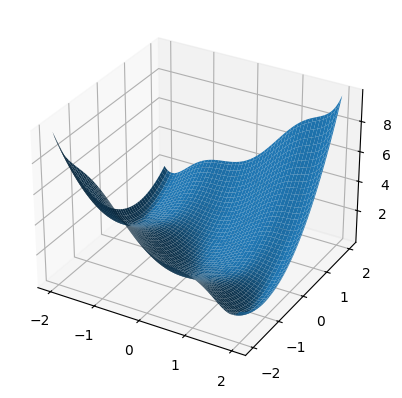

In [25]:
import numpy as np, matplotlib.pyplot as plt

def Camel(point):
    x, y = point
    return 2 * x**2 - 1.05 * x**4 + x**6 / 6 + x * y + y**2

def plot_surface(func, x_min=-2, x_max=2, y_min=-2, y_max=2):
    a = np.linspace(x_min, x_max, 100)
    b = np.linspace(y_min, y_max, 100)
    x,y = np.meshgrid(a, b)
    z = func((x, y))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(x, y, z)

plot_surface(Camel)

<img src="SA.svg" />

+ Random Displacement:

$$X_{i+1} = X_i + \Delta * (2 * \mathrm{URN} -1)$$

+ Metropolis Rule:

$$P(\mathrm{accept})=\exp\left(-\frac{\Delta E}{T}\right)$$

## *TODO*: Finish SA code

In [33]:
def SA(solution, func, schedule, delta, boundary, n_iter, report_interval=None):
    """ 
    Simulated Annealing for minimization
    
    Parameters
    ----------
    solution: np.ndarray
        Initial guess
    func: Callable
        Function to minimize
    schedule: np.ndarray
        An array of temperatures for simulated annealing
    delta: float
        Magnitude of random displacement
    boundary: tuple
        Boundary of the variables to minimize. (lowerbound,upperbound)
    n_iter: int
        Number of random displacement move in each temperature
    report_interavl: int
        Number of temperature steps to report result
    
    Returns
    -------
    res: dict
        Minimized point and its evaulation value
    """
    
    best_solution = solution.copy()
    lowest_eval = func(best_solution)
    
    for idx, temp in enumerate(schedule):
        if report_interval is not None and ((idx + 1) % report_interval == 0 or idx == 0):
            msg = (
                f"{idx + 1}/{len(schedule)}, Temp: {temp:.2f}, "
                f"Best solution: {best_solution}, Value: {lowest_eval:.7f}"
            )
            print(msg)
        
        for n in range(n_iter):
            trial = solution.copy()
            trial += delta * (2 * np.random.random(len(trial)) - 1)
            if np.all(trial >= boundary[0]) and np.all(trial <= boundary[1]):
                # fill in acceptance criterion
                if np.exp(-(func(trial) - func(solution)) / temp) > np.random.random():
                    solution = trial
                    if func(solution) < lowest_eval:
                        # update solution here
                        best_solution = solution.copy()
                        lowest_eval = func(best_solution)
                        
    return {"solution":best_solution, "evaluation":lowest_eval}

## Metropolis algo for sampling

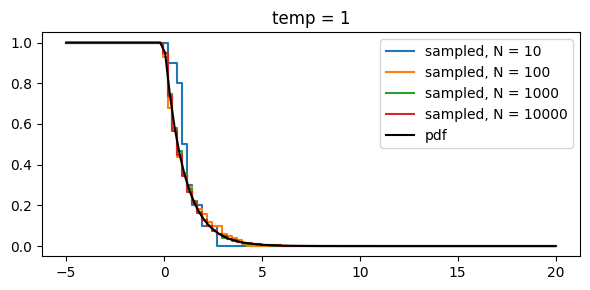

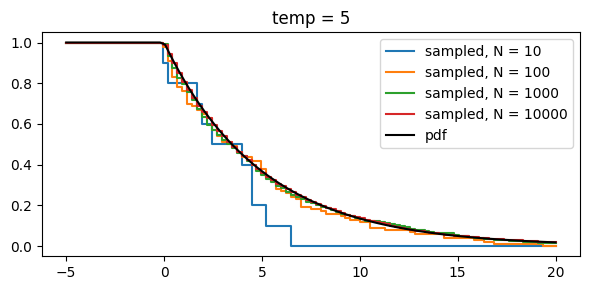

In [34]:
def pdf(x,args):
    return np.where(x>0,np.exp(-x/args[0]),1)
    
temp = 5
for temp in [1,5]:
    x = np.linspace(-5,20,100)
    plt.figure(figsize=(6,3))

    for N in [10,100,1000,10000]:
        samples = (pdf(x,[temp])[:,None]>np.random.random(N)[None,:]).sum(1)
        plt.step(x,samples/N,where='mid',label=f'sampled, N = {N}',)

    plt.plot(x,pdf(x,[temp]),'k',label='pdf')
    plt.title(f'temp = {temp}')
    plt.legend()
    plt.tight_layout()

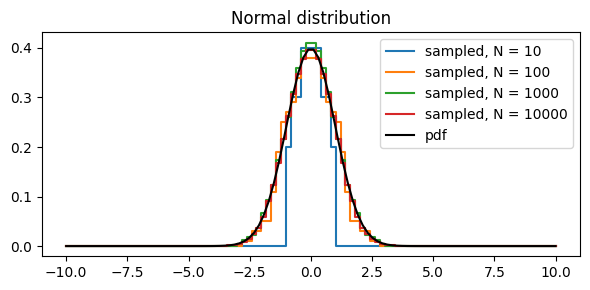

In [35]:
def pdf(x,args):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)


x = np.linspace(-10,10,100)
plt.figure(figsize=(6,3))

for N in [10,100,1000,10000]:
    samples = (pdf(x,[])[:,None]>np.random.random(N)[None,:]).sum(1)
    plt.step(x,samples/N,where='mid',label=f'sampled, N = {N}',)

plt.plot(x,pdf(x,[]),'k',label='pdf')
plt.title(f'Normal distribution')
plt.legend()
plt.tight_layout()

## Local minimization method fails


In [36]:
from scipy.optimize import minimize

starting_point = np.array([-1.7, 0.7])
minimize(Camel, starting_point, method="BFGS")

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.298638442236861
        x: [-1.748e+00  8.738e-01]
      nit: 5
      jac: [ 3.129e-07 -7.451e-09]
 hess_inv: [[ 8.564e-02 -4.261e-02]
            [-4.261e-02  5.250e-01]]
     nfev: 21
     njev: 7

## SA with linear cooling

In [45]:
# Start from a point which is close to local minimum
linear_cooling = np.linspace(3000, 50, 1000)
SA(starting_point, Camel, linear_cooling, 0.1, (-2, 2), 5, 100)

1/1000, Temp: 3000.00, Best solution: [-1.7  0.7], Value: 0.3332232
100/1000, Temp: 2707.66, Best solution: [-1.73741446  0.92389844], Value: 0.3022725
200/1000, Temp: 2412.36, Best solution: [-1.73741446  0.92389844], Value: 0.3022725
300/1000, Temp: 2117.07, Best solution: [-1.73486069  0.8456993 ], Value: 0.3000280
400/1000, Temp: 1821.77, Best solution: [-0.1816215   0.43222392], Value: 0.1731526
500/1000, Temp: 1526.48, Best solution: [-0.1816215   0.43222392], Value: 0.1731526
600/1000, Temp: 1231.18, Best solution: [-0.12066591  0.27221605], Value: 0.0701528
700/1000, Temp: 935.89, Best solution: [-0.12066591  0.27221605], Value: 0.0701528
800/1000, Temp: 640.59, Best solution: [-0.12066591  0.27221605], Value: 0.0701528
900/1000, Temp: 345.30, Best solution: [-0.12066591  0.27221605], Value: 0.0701528
1000/1000, Temp: 50.00, Best solution: [-0.12066591  0.27221605], Value: 0.0701528


{'solution': array([-0.12066591,  0.27221605]),
 'evaluation': 0.07015281989297005}

## *TODO*: Try SA with logarithmic cooling

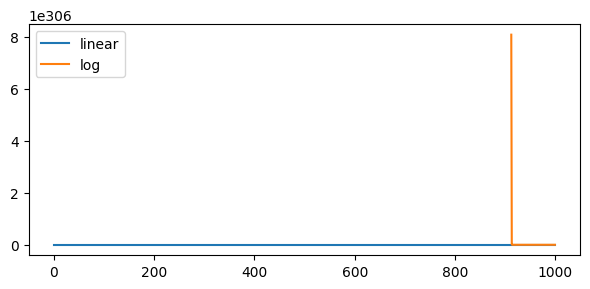

In [46]:
log_cooling = np.logspace(3000, 50, 1000)

plt.figure(figsize=(6,3))
plt.plot(linear_cooling,label='linear')
plt.plot(log_cooling,label='log')
plt.legend()
plt.tight_layout()

In [39]:
SA(starting_point, Camel, log_cooling, 0.1, (-2, 2), 5, 100)

1/1000, Temp: inf, Best solution: [-1.7  0.7], Value: 0.3332232
100/1000, Temp: inf, Best solution: [-1.68538129  0.72718695], Value: 0.3320861
200/1000, Temp: inf, Best solution: [-1.73735266  0.87310791], Value: 0.2992532
300/1000, Temp: inf, Best solution: [-1.73735266  0.87310791], Value: 0.2992532
400/1000, Temp: inf, Best solution: [-0.18476388  0.42695259], Value: 0.1704615
500/1000, Temp: inf, Best solution: [ 0.00779412 -0.0297886 ], Value: 0.0007767
600/1000, Temp: inf, Best solution: [ 0.00779412 -0.0297886 ], Value: 0.0007767
700/1000, Temp: inf, Best solution: [ 0.00779412 -0.0297886 ], Value: 0.0007767
800/1000, Temp: inf, Best solution: [ 0.00779412 -0.0297886 ], Value: 0.0007767
900/1000, Temp: inf, Best solution: [ 0.00779412 -0.0297886 ], Value: 0.0007767
1000/1000, Temp: 100000000000000007629769841091887003294964970946560.00, Best solution: [ 0.00779412 -0.0297886 ], Value: 0.0007767


{'solution': array([ 0.00779412, -0.0297886 ]),
 'evaluation': 0.0007766772987190596}